In [1]:
#setup for all figures

from pi_or_ci.file_loader import get_all_data_and_cutoffs
from pi_or_ci.transition_plots import plot_transitions,plot_transition_differences
from pi_or_ci.fraction_plotter import plot_fracs_at_temp
from pi_or_ci.contour_plots import plot_contours
from pi_or_ci.cutoff_plots import plot_cutoffs,connect_cutoffs
from pi_or_ci.utils import iscolor,add_custom_legend,all_color_names,\
                                    all_marker_names,all_linestyle_names,cycle_colors,\
                                    get_ions
from pi_or_ci.contour_plots import frac_ratio
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import roman
from pi_or_ci.ionization_energies_explorer import get_energy_cutoffs_dicts,view_energies,view_cutoffs
from pi_or_ci.ionization_energies_explorer import plot_cutoffs_by_energies
from pi_or_ci.coronal_approx import get_coronal_approx,get_cloudy_cie
import matplotlib.pyplot as plt



In [2]:
with open('/Users/claytonstrawn/pi_or_ci/pi_or_ci/background_variation_tables/hm12_alpha_table.txt') as f:
    data = f.readlines()
for line in data:
    exec(line)
with open('/Users/claytonstrawn/pi_or_ci/pi_or_ci/background_variation_tables/hm12_redshift_table.txt') as f:
    s = f.read()
hm12_redshifts = []
xs = {}
ys = {}
for line in s.split('\n'):
    if line == '':
        continue
    elif line[0] == 'z':
        redshift = float(line.split()[2])
        hm12_redshifts.append(redshift)
    elif line.split()[0] == 'old':
        x_or_y = line.split()[2]
    elif line[0] == '[':
        nums_strs = line.strip('[]').split(', ')
        nums = [float(x) for x in nums_strs]
        ary = np.array(nums)
        if x_or_y == 'xs:':
            xs[redshift]=ary
        elif x_or_y == 'ys:':
            ys[redshift]=ary
hm12_redshifts = np.array(hm12_redshifts)

In [3]:
#create the data used for all figures from CLOUDY output tables

#set loud=True to get a full printout of every ions state at every temp

d,c = get_all_data_and_cutoffs(loud=False,threshold = .05,whichzs = 'ints',
                               min_stable_num = 5,whichradfields = ['HM12','a0.28','a0.835','a1.945','a2.5'])
a,io,e,c2 = get_energy_cutoffs_dicts(redshift = 0.0,t_used='min',cutoffs = c)


file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z1.00_HM12.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z1.00_a0.28.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z1.00_a0.835.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z1.00_a1.945.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z1.00_a2.5.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z2.00_HM12.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z2.00_a0.28.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z2.00_a0.835.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z2.00_a1.945.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z2.00_a2.5.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z3.00_HM12.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z3.00_a

/Users/claytonstrawn/pi_or_ci/pi_or_ci/find_pi_cutoffs.py:29: RuntimeWarning: divide by zero encountered in log10
  log_frac = np.log10(f_i[:,j])
/Users/claytonstrawn/miniconda3/envs/myenv3/lib/python3.9/site-packages/numpy/lib/function_base.py:1281: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


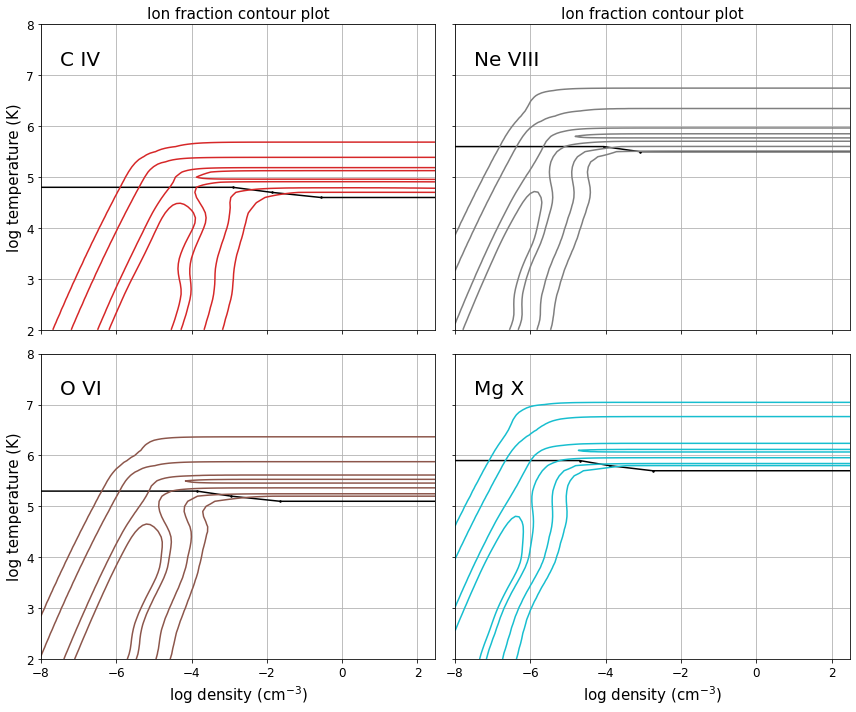

In [6]:
#figure 1
fig,axes = plt.subplots(2,2,figsize = (12,10),sharex = True,sharey = True)
for i in range(4):
    ion = {0:'C IV',1:'O VI',2:'Ne VIII',3:'Mg X'}[i]
    ax = axes[i%2,i//2]
    plot_contours([ion],0.0,show_cutoffs= 'black',levels = [.001,.01,.1,.2],\
                  data = d,cutoffs = c,ax = ax,radfield = 'HM12',fig=fig,show_values=False)
    ax.text(-7.5,7.2,ion,size = 20)
    if i//2==0:
        ax.set_ylabel('log temperature (K)',size = 15)
    elif i//2==1:
        ax.set_ylabel('')
    if i%2==0:
        ax.set_xlabel('')
        ax.set_title('Ion fraction contour plot',size = 15)
        ax.set_ylim(2,7.95)
    elif i%2 == 1:
        ax.set_title('')
        ax.set_xlabel('log density (cm'+r'$^{-3}$)',size = 15)

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid()
    ax.get_legend().remove()
plt.subplots_adjust(wspace=0.02, hspace=0.025)
plt.tight_layout()
fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/1_contour_plots.png",dpi = 100,bbox_inches='tight')

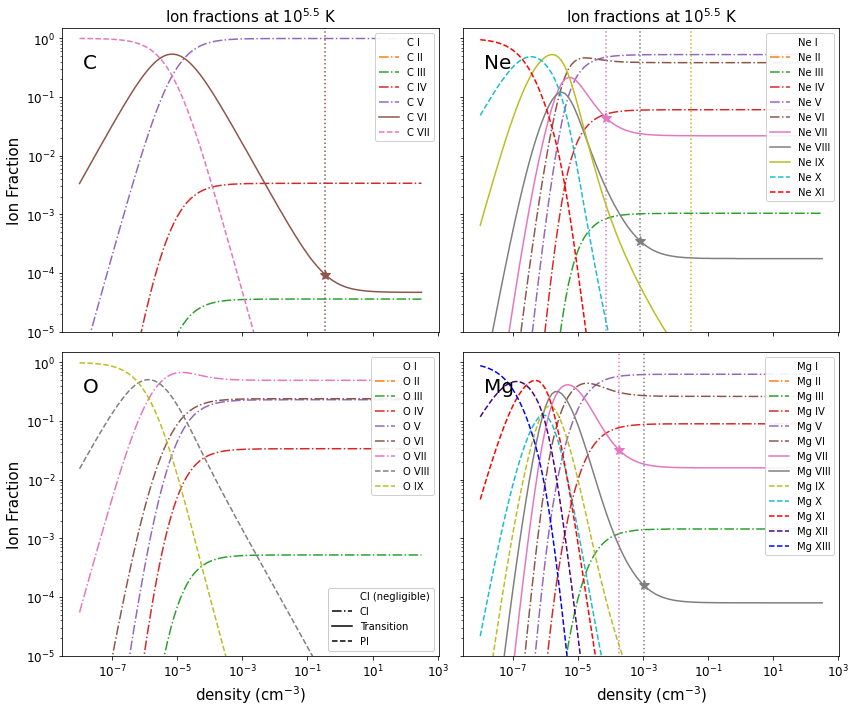

In [8]:
#figure 2
fig,axes = plt.subplots(2,2,figsize = (12,10),sharex = True,sharey = True)
for i in range(4):
    atom = {0:'C',1:'O',2:'Ne',3:'Mg'}[i]
    ax = axes[i%2,i//2]
    plot_fracs_at_temp(atom,0.0,10**5.5,data = d,cutoffs = c,show_mechanism=True,\
                       ax = ax,legend_params = {'loc':'upper right','framealpha':0.9})
    ax.text(10**-7.9,10**-.5,atom,size = 20)
    if i//2==0:
        ax.set_ylabel('Ion Fraction',size = 15)
    elif i//2==1:
        ax.set_ylabel('')
    if i%2==0:
        ax.set_xlabel('')
        ax.set_title('Ion fractions at '+r'$10^{5.5}$ K',size = 15)
    elif i%2 == 1:
        ax.set_title('')
        ax.set_xlabel('density (cm'+r'$^{-3}$)',size = 15)

    ax.tick_params(axis='both', which='major', labelsize=12)
 
    if i==1:
        labels_colors_dict = {'CI (negligible)':'','CI':'-.','Transition':'-','PI':'--'}
        add_custom_legend(ax,labels_colors_dict,loc = None,bbox = None,keep_old_legend = True)
plt.subplots_adjust(wspace=0.02, hspace=0.025)
plt.tight_layout()
fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/2_frac_dens.png",dpi = 100,bbox_inches='tight')

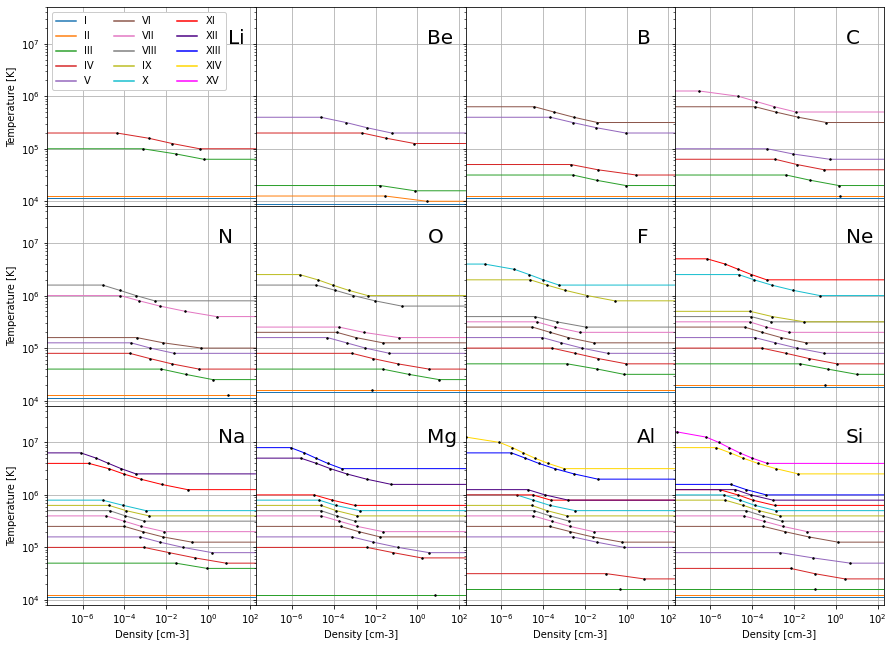

In [9]:
#figure 3

atoms = ['Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si']
redshift = 0

fig,axes = plt.subplots(3,4,figsize = (15,11),sharex = True,sharey = True,squeeze = False)
for j,atom in enumerate(atoms):
    ax = axes[j//4,j%4]
    plot_cutoffs(atom,redshift,ax=ax,data = d,cutoffs = c,linewidth = 1,first_offset = .1)
    if j % 4 == 0:
        ax.set_ylabel('Temperature [K]')
    else:
        ax.set_ylabel('')
    if j // 4 == 2:
        ax.set_xlabel('Density [cm-3]')
    else:
        ax.set_xlabel('')
    ax.set_title('')
    ax.set_ylim(8e3,5e7)
    ax.set_xlim(2e-8,2e2)
    if j!=0:
        ax.text(3e0,1e7,atom,size = 20)
    else:
        ax.text(9e0,1e7,atom,size = 20)
    ax.grid()
    ax.get_legend().remove()
    legend_dict = {}
for i,value in enumerate(range(1,16)):
    legend_dict[roman.toRoman(value)] = cycle_colors[i]
add_custom_legend(axes[0][0],legend_dict,loc = 'upper left',keep_old_legend=False,ncol = 3)
plt.subplots_adjust(wspace=0, hspace=0.0)
fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/3_cutoffs.png",dpi = 100,bbox_inches='tight')



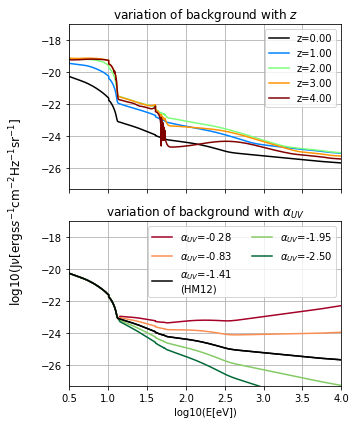

In [10]:
#figure 4
cmap = matplotlib.cm.get_cmap('jet')
def closest_to(hm12_redshifts,z):
    return np.argmin(np.abs(hm12_redshifts-z))
fig,axes = plt.subplots(2,1,sharex = True,sharey = True,figsize = (5,6))
ax = axes[0]
is_to_use = np.zeros(5).astype(int)
for i,z in enumerate([0,1,2,3,4]):
    is_to_use[i] = (closest_to(hm12_redshifts,z))
zs_to_use = hm12_redshifts[is_to_use]
zs_to_use = [0,1,2,3,4]
for i,z in enumerate(zs_to_use):
    index = closest_to(hm12_redshifts,z)
    z_key = hm12_redshifts[index]
    if i==0:
        color = 'black'
    else:
        color = cmap(i/(len(zs_to_use)-1))
    ax.plot(xs[z_key],ys[z_key],label = f'z={z:.2f}',color = color)
ax.legend(loc = 'upper right')
ax.grid()
#ax.set_ylabel('log10(J$\\nu$[ergs$s^{-1}$cm$^{-2}$Hz$^{-1}$sr$^{-1}$]')
ax.set_title(r'variation of background with $z$')

ax = axes[1]
cmap2 = matplotlib.cm.get_cmap('RdYlGn')
background_alpha_dict = {-0.28:(a028_xs,a028_ys),
     -0.835:(a0835_xs,a0835_ys),
     -1.41:(hm12_xs,hm12_ys),
     -1.945:(a1945_xs,a1945_ys),
     -2.5:(a25_xs,a25_ys),
    }
for i,key in enumerate(background_alpha_dict.keys()):
    if key == -1.41:
        color = 'black'
        label = '$\\alpha_{UV}$'+f'={-1.41}\n'+'(HM12)'
    else:
        color = cmap2(i/(len(background_alpha_dict.keys())-1))
        label = '$\\alpha_{UV}$=%2.2f' % key
    ax.plot(background_alpha_dict[key][0],background_alpha_dict[key][1],label=label,color = color)
ax.plot(background_alpha_dict[-1.41][0],background_alpha_dict[-1.41][1],label=None,color = 'black')
ax.set_xlim(0.5,4)
ax.set_ylim(-27.3,-17)
ax.grid()
ax.legend(loc = 'upper right',ncol=2)
ax.set_xlabel('log10(E[eV])')
ax.set_title(r'variation of background with $\alpha_{UV}$')
fig.supylabel('log10(J$\\nu$[ergs$s^{-1}$cm$^{-2}$Hz$^{-1}$sr$^{-1}$]')
plt.tight_layout()
fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/4_uvb.png",dpi = 100,bbox_inches='tight')


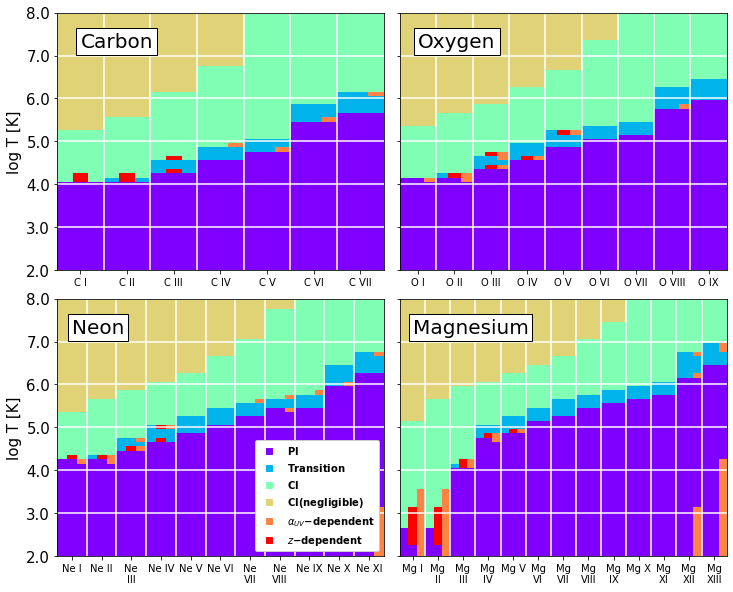

In [11]:
#figure 5

long_atoms = {'C':'Carbon','N':'Nitrogen','O':'Oxygen','Ne':'Neon','Mg':'Magnesium','Si':'Silicon'}

atoms = ['C','Ne','O','Mg']
redshifts = [0,1,2,3,4]
radfields = ['HM12','a0.28','a0.835','a1.945','a2.5']

fig,axes = plt.subplots(2,2,figsize = (12,10),sharex = False,sharey = True)
for i,atom in enumerate(atoms):
    ax = axes[i%2][i//2]
    comparisons = ({'redshifts':redshifts,'radfields':'HM12'},{'redshifts':0,'radfields':radfields})
    vals = plot_transition_differences(atom,data = d,cutoffs = c,comparisons = comparisons,ax=ax,scaling_of_std = (3,2.3))
    ax.set_xlabel('')
    if i//2 == 0:
        ax.set_ylabel('log T [K]', size=15)
    ax.set_title('')
    ax.tick_params(axis='y', which='major', labelsize=15)

    t = ax.text(1,52,long_atoms[atom],size = 20,color = 'black')
    t.set_bbox(dict(facecolor='white'))
    if i==1:
        cmap = matplotlib.cm.get_cmap('rainbow')
        unique_values = np.unique(vals)
        legend_dict = {}
        for j,value in enumerate([r'$\bf{PI}$',r'$\bf{Transition}$',r'$\bf{CI}$',r'$\bf{CI (negligible)}$',r'$\alpha_{UV}\bf{ - dependent}$',r'$z \bf{- dependent}$']):
            legend_dict[value] = (cmap(unique_values[j])[:-1],'s','')
        add_custom_legend(ax,legend_dict,loc = 'lower right',bbox = (1,0),keep_old_legend=False)

plt.subplots_adjust(wspace=0.05, hspace=.11)
fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/5_transitions_zdep.png",dpi = 100,bbox_inches='tight')

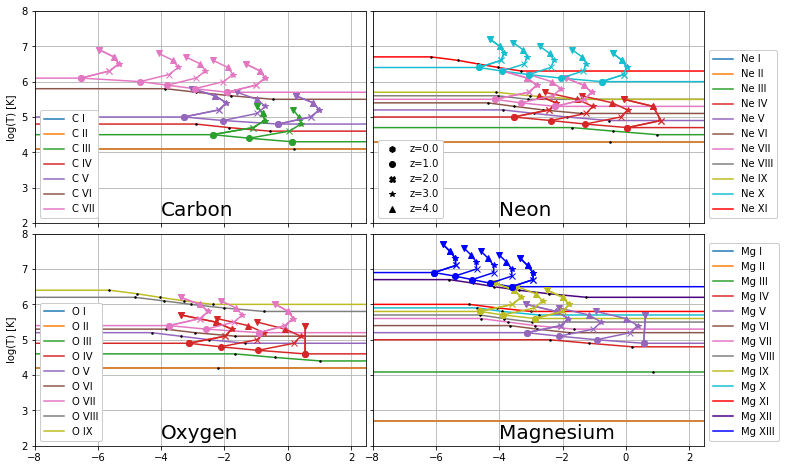

In [12]:
#figure 6

long_atoms = {'C':'Carbon','N':'Nitrogen','O':'Oxygen','Ne':'Neon','Mg':'Magnesium','Si':'Silicon'}
atoms = ['C','O','Ne','Mg']
redshifts = [0,1,2,3,4]

fig,axes = plt.subplots(2,2,figsize = (12,8),sharex = True,sharey = True)
for i,atom in enumerate(atoms):
    ax = axes[i%2][i//2]
    redshift = redshifts[0]
    plot_cutoffs(atom,redshift,data = d,cutoffs = c,ax=ax,\
                     log='values')
    connect_cutoffs(atom,[0,1,2,3,4],ax=ax,data=d,cutoffs=c,max_num_ions=3)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
    if i//2==0:
        ax.set_ylabel("log(T) [K]")
    ax.text(-4,2.2,long_atoms[atom],size = 20)
    ax.grid()
    legend_dict1 = {}
    for ion in get_ions(atom):
        legend_dict1[ion]=None
    legend_dict2 = {}
    for j,redshift in enumerate(redshifts):
        legend_dict2["z=%.1f"%redshift] = all_marker_names[j]
    if i in [0,1]:
        add_custom_legend(ax,legend_dict1,loc = 'lower left',bbox = (0,0),keep_old_legend=False)
    elif i == 2:
        add_custom_legend(ax,legend_dict1,loc = 'lower left',bbox = (1,0),keep_old_legend=False)
        add_custom_legend(ax,legend_dict2,loc = 'lower left',bbox = (0,0),keep_old_legend=True)
    elif i == 3:
        add_custom_legend(ax,legend_dict1,loc = 'lower left',bbox = (1,0),keep_old_legend=False)
    
plt.subplots_adjust(wspace=.02, hspace=.05)

fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/6_dens_zdep.png",dpi = 150,bbox_inches='tight')


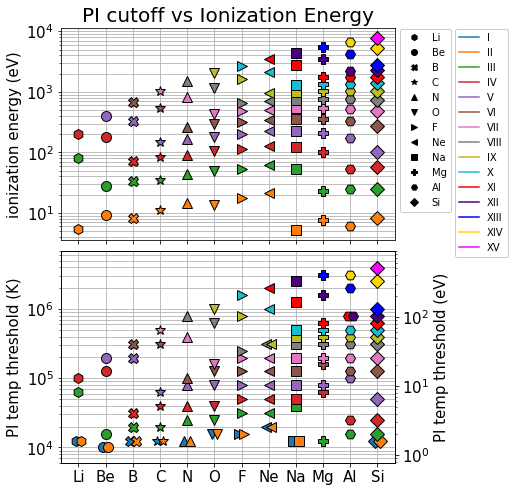

In [13]:
#figure 7

fig,axes = plt.subplots(2,1,figsize = (6,8),sharex = True,sharey = False)
ax = axes[0]
view_energies(atoms = a,ions=io,ionization_energy_dict = e,funky_symbols = True,ax=ax,grid = True)
ax.set_title('PI cutoff vs Ionization Energy',size = 20)
ax = axes[1]
view_cutoffs(atoms = a,ions=io,ionization_energy_dict = e,PI_cutoff_temps_dict = c2,
             funky_symbols = True,ax=ax,legend = False,grid = True)
#ax.set_ylim(8e3,5e6)

plt.subplots_adjust(wspace=.02, hspace=.05)

fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/7_energy_and_cutoff.png",dpi = 150,bbox_inches='tight')



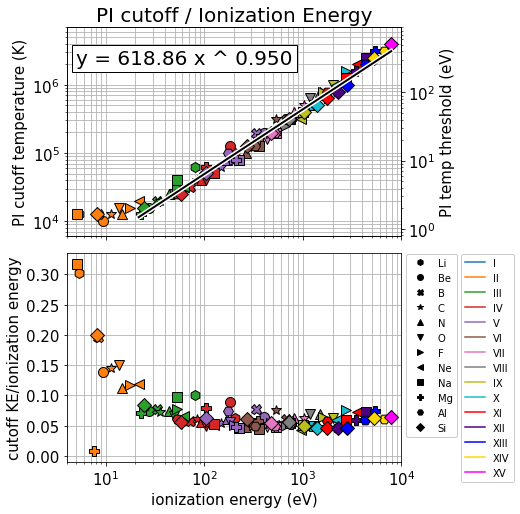

In [14]:
#figure 8

fig,axes = plt.subplots(2,1,figsize = (6,8),sharex = True,sharey = False)
ax = axes[0]
plot_cutoffs_by_energies(atoms = a,ions=io,ionization_energy_dict = e,PI_cutoff_temps_dict=c2,
                         legend = False,ax=ax,linecolor = 'black',lineedgecolor = 'white')#,xlims_for_linreg = (8e1,8e3))
ax.set_xlabel('')

ax.set_title('PI cutoff / Ionization Energy',size = 20)
ax = axes[1]
plot_cutoffs_by_energies(atoms = a,ions=io,ionization_energy_dict = e,PI_cutoff_temps_dict=c2,units = 'relative',ax=ax)
plt.subplots_adjust(hspace=.08)

fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/8_energy_over_cutoff.png",dpi = 150,bbox_inches='tight')



/Users/claytonstrawn/pi_or_ci/pi_or_ci/coronal_approx.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return B*kT**2*eh**2/energy_diffs[i]**4*exp(-2*energy_diffs[i]/kT)/e1(energy_diffs[i]/kT)
<ipython-input-15-bcd3190bb905>:24: RuntimeWarning: divide by zero encountered in true_divide
  to_plot_ind = (current_term/corona_cie[j])**invert
<ipython-input-15-bcd3190bb905>:37: RuntimeWarning: divide by zero encountered in reciprocal
  to_plot2 = (cloudy_cie[i])**invert
<ipython-input-15-bcd3190bb905>:24: RuntimeWarning: divide by zero encountered in reciprocal
  to_plot_ind = (current_term/corona_cie[j])**invert
<ipython-input-15-bcd3190bb905>:24: RuntimeWarning: invalid value encountered in true_divide
  to_plot_ind = (current_term/corona_cie[j])**invert
<ipython-input-15-bcd3190bb905>:36: RuntimeWarning: divide by zero encountered in reciprocal
  to_plot = (current_term/sum_of_terms)**invert
<ipython-input-15-bcd3190bb905>:36: RuntimeWarning: overflow encountered in r

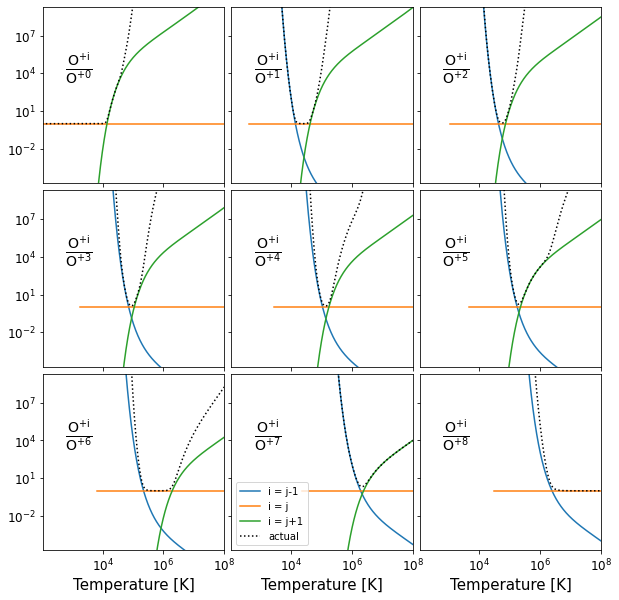

In [15]:
#figure 9

import matplotlib.pyplot as plt
from pi_or_ci.utils import cycle_colors

energies,corona_temps,corona_cie = get_coronal_approx('O',e = e)
cloudy_temps,cloudy_cie = get_cloudy_cie('O',d=d)

sum_of_terms = np.sum(corona_cie,axis = 0)
invert = -1

fig,axes = plt.subplots(3,3,figsize = (10,10),sharex = True,sharey = True)

plot_cloudy = False
plot_indlines = True
plot_approx = False
plot_actual = True

for i in range(0,len(energies)):
    current_term = corona_cie[i]
    ax = axes[i//3,i%3]
    to_plot3 = corona_temps*0
    for k,j in enumerate(range(i-1,i+2)):
        if j<0 or j >= len(energies):
            continue
        to_plot_ind = (current_term/corona_cie[j])**invert
        to_plot3 += to_plot_ind
        if k==0:
            ion = 'i = j-1'
        elif k==1:
            ion = 'i = j'
        elif k==2:
            ion = 'i = j+1'
        if plot_indlines:
            ax.loglog(corona_temps,to_plot_ind,color = cycle_colors[k],label = ion)
        if k==2 and plot_approx:
            ax.loglog(corona_temps,to_plot3,color = 'k',label = None)
    to_plot = (current_term/sum_of_terms)**invert
    to_plot2 = (cloudy_cie[i])**invert
    if plot_cloudy:
        ax.loglog(cloudy_temps,to_plot2,'--',color = 'red',label = 'Cloudy')
    if plot_actual:
        ax.loglog(corona_temps,to_plot,':',color = 'k',label = 'actual')
    if i==7:
        ax.legend(loc='lower left')
    if invert:
        ax.set_ylim(1.9e-5,2e9)
    else:
        ax.set_ylim(1e-10,1e5)
    ax.set_xlim(1.1e2,1e8)
    ion = 'O '+roman.toRoman(i+1)
    string='$\\frac{\\rm{O}^{+i}}{\\rm{O^{+%d}}}$'%i
    raw_string = r"%s"%string
    ax.text(6e2,1e4,raw_string,size = 20)
    if i%3 == 0:
        pass
        #ax.set_ylabel('ratio')
    if i//3 == 2:
        ax.set_xlabel('Temperature [K]',size = 15)
    #ax.grid(which='both')
    ax.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace=.04,wspace = .04)

        
fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/9_coronal_approx.png",dpi = 150,bbox_inches='tight')


/Users/claytonstrawn/pi_or_ci/pi_or_ci/contour_plots.py:134: RuntimeWarning: divide by zero encountered in true_divide
  C = np.log10(tocompare2/tocompare1)
/Users/claytonstrawn/pi_or_ci/pi_or_ci/contour_plots.py:134: RuntimeWarning: invalid value encountered in true_divide
  C = np.log10(tocompare2/tocompare1)
/Users/claytonstrawn/pi_or_ci/pi_or_ci/contour_plots.py:134: RuntimeWarning: divide by zero encountered in log10
  C = np.log10(tocompare2/tocompare1)


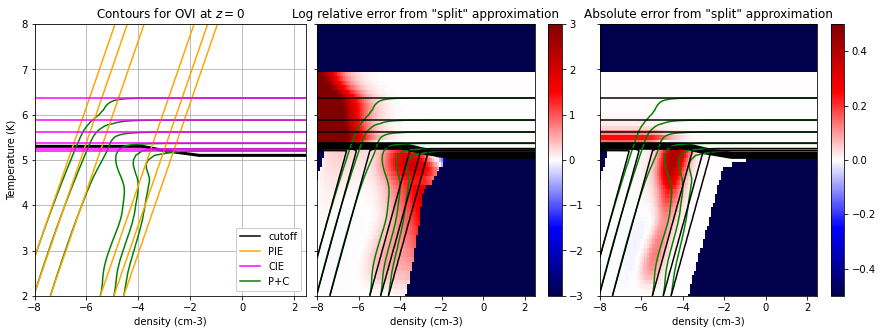

In [16]:
#figure 10

import matplotlib.pyplot as plt
import numpy as np
color1 = 'green'
color2 = 'orange'
color3 = 'magenta'
color4 = 'black'

fig,axes = plt.subplots(1,3,figsize = (15,5),sharex = True,sharey = True)
ax = axes[0]
mylevels = [.001,.01,.1]
ax = plot_contours(['O VI'],0.0, show_cutoffs= 'black',data = d,cutoffs = c,mechanism= 'both',ax = ax,colors = color1,cutoff_linewidth = 3,levels = mylevels)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'PI',ax = ax,colors = color2,levels = mylevels)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'CI',ax = ax,colors = color3,levels = mylevels)
ax.grid()
ax.set_title(r'Contours for OVI at $z=0$')
legend_dict = {'cutoff':'black','PIE':color2,'CIE':color3,'P+C':color1}
add_custom_legend(ax,legend_dict,loc = 'lower right',bbox = (1,0),keep_old_legend=False)
ax = axes[1]
ax = frac_ratio('O VI',0.0, show_cutoffs= 'black',data=d,cutoffs=c,ax = ax)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'both',ax = ax,colors = color1,levels = mylevels)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'split',ax = ax,colors = color4,levels = mylevels)
ax.get_legend().remove()
ax.set_ylabel('')
ax.set_title('Log relative error from "split" approximation')
#ax.grid()
ax = axes[2]
ax = frac_ratio('O VI',0.0, show_cutoffs= 'black',data=d,cutoffs=c,ax = ax,log = False)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'both',ax = ax,colors = color1,levels = mylevels)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'split',ax = ax,colors = color4,levels = mylevels)
ax.get_legend().remove()
ax.set_ylabel('')
ax.set_title('Absolute error from "split" approximation')
#ax.grid()
plt.subplots_adjust(hspace=.08,wspace = .04)
#plt.tight_layout()

fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/10_split_approx.png",dpi = 150,bbox_inches='tight')



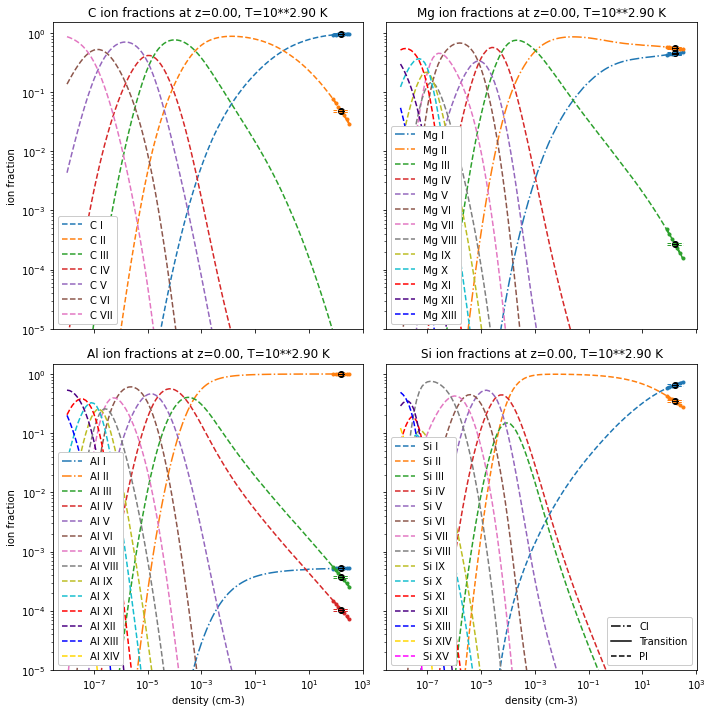

In [17]:
#figure A1

t = 10.**2.9
redshift = 0.00
bold_last = 7
#ts = 10**np.arange(2.0,5.01,0.5)
fig,axes = plt.subplots(2,2,figsize = (10,10),sharex = True,sharey = True)
atom,redshift = ('C',redshift)
ax = axes[0][0]
plot_fracs_at_temp(atom,redshift,t,data = d,cutoffs = c,show_mechanism=True,bold_last = bold_last,ax=ax,threshold = .04,legend_params = {'loc':'lower left','bbox_to_anchor':(0,0),'framealpha': 1.0})
atom,redshift = ('Mg',redshift)
ax.set_xlabel('')
ax = axes[0][1]
plot_fracs_at_temp(atom,redshift,t,data = d,cutoffs = c,show_mechanism=True,bold_last = bold_last,ax=ax,threshold = .04,legend_params = {'loc':'lower left','bbox_to_anchor':(0,0),'framealpha': 1.0})
ax.set_ylabel('')
ax.set_xlabel('')
atom,redshift = ('Al',redshift)
ax = axes[1][0]
plot_fracs_at_temp(atom,redshift,t,data = d,cutoffs = c,show_mechanism=True,bold_last = bold_last,ax=ax,threshold = .04,legend_params = {'loc':'lower left','bbox_to_anchor':(0,0),'framealpha': 1.0})
ax = axes[1][1]
atom,redshift = ('Si',redshift)
plot_fracs_at_temp(atom,redshift,t,data = d,cutoffs = c,show_mechanism=True,bold_last = bold_last,ax=ax,threshold = .04,legend_params = {'loc':'lower left','bbox_to_anchor':(0,0),'framealpha': 1.0})
ax.set_ylabel('')
labels_colors_dict = {'CI':'-.','Transition':'-','PI':'--'}
add_custom_legend(ax,labels_colors_dict,loc = None,bbox = None,keep_old_legend = True)
plt.subplots_adjust(hspace=.08,wspace = .04)
plt.tight_layout()

fig.savefig("/Users/claytonstrawn/pi_ci_paper_plots/A1_Mg_Al_weirdness.png",dpi = 150,bbox_inches='tight')

